# Titanic: Machine Learning from Disaster

### Introduction

This is my solution from the famous titanic problem.In this challenge, They ask to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Steps

The solution is divided into number of steps:

1.Acquire training and test set.

2.Discover and analyze the data

3.Perform data wrangling, cleaning and Extract new features

4.Model, predict and solve the problem

5.Draw conclusions

First let's import the important packages that we will use in this problem

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

#### Step 1:Acquire training and test set.

First of all let's load our training and test sets required to solve the problem.


In [2]:
training_path='E:/Project/Titanic/train.csv'
testing_path='E:/Project/Titanic/test.csv'
train=pd.read_csv(training_path)
test=pd.read_csv(testing_path)
#instead of merging the two sets in order to perform cleaning on them, we put them in a list and loop through them
combined=[train,test]

#### Step 2:Discover and analyze the data

We can check the features' description from [here](https://www.kaggle.com/c/titanic/data), but at the meantime let's print the columns here.

In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can divide the features into 2 features:

1.Numeric features: These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

example:Age, Fare, SibSp,Parch.

2.Catogrical features: These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

example: Survived, Pclass, Sex, Embarked.

There is also alphanumeric types such as Ticket and Cabin.

Let's go deeper with the data to explore more interesting facts

In [5]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

##### Observations

1.Features like Cabin, Age and Embarked have null values in the training set.

2.Features like Cabin, Age and Fare have null values in the test set.

these null values needs to be corrected by replacing them with valid values.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations

1.There are 38% from passenger who actually survived!

2.Most passengers' ages ranged from 20 to 38 years old.

3.Few who paid the most expensive fare(512).

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nysveen, Mr. Johan Hansen",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


#### Observations

1.Most of the passerngers were males.

2.Most of the passengers travelled from the same port(Southampton). 

#### Assumptions

Now after seeing the data we must decide which features should we use in order to minimize the features to optimize the model.

1.Drop the PassengerId,Ticket columns as it doesn't contribute in the survival rate.

2.Drop the Cabin column because of the amount of missing values in it.

3.Create new feature from the Name column(Title for example).

4.Merge the Parch and SibSp columns into 1 feature(Family).

5.Replace the null values in Age and Emarked columns.

6.Test some assumptions about feartures correlating with the survival rate.

#### Correlating features using pivoting

We can try correlating features with each other in order to find pattern between them.

Let's start with the Pclass column.

In [8]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We see that 62% from the passengers in the Pclass had survived.

Decision: Add PClass in the features used in the model.

In [9]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We see that most of the survived passengers were actually women.

#### Analyze by plotting

We can numerical features for corrleation with each other.

<Figure size 1008x864 with 0 Axes>

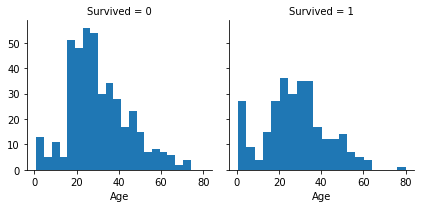

In [10]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

#### Observation

1.Most of the children survived.

2.Passengers between 17 and 40 didn't survive.

3.Passengers that were older than 65 survived.

<Figure size 1008x864 with 0 Axes>

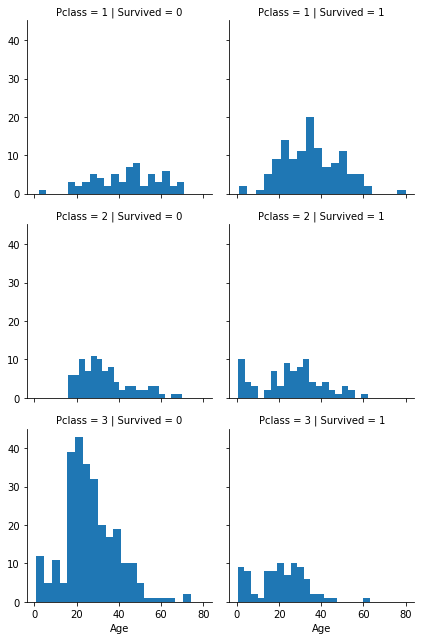

In [11]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20)

This confirm our assumptions above:

1.Most PClass 1 passengers had survived, while 3 not.

2.Infant people in Pclass 2 & 3 mostly survived.


c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1008x864 with 0 Axes>

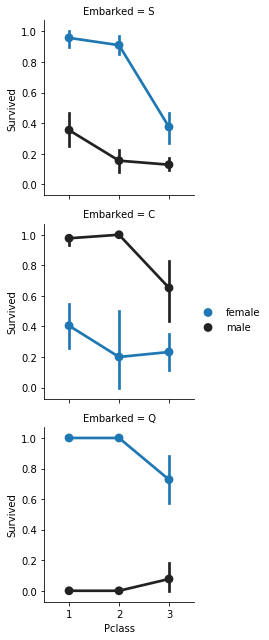

In [12]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

#### Observation

1.Except for Embarked C, women had more chances in surviving more than men.



### Step 3 :  Wrangling and cleaning data

Now we need to prepare the data to be ready for the model by filling any missing values and extract new features to make the model more accurate.

We start by dropping the cabin and ticket columns as they are not needed.

In [13]:
train=train.drop(['Cabin','Ticket'],axis=1)
test=test.drop(['Cabin','Ticket'],axis=1)
combined=[train,test]

In [14]:
train.shape,test.shape

((891, 10), (418, 9))

Instead of the names we can use the title of each passenger as it may gives us insights ,for example : the wealthy passengers might have more chances in survival.

We will use regular expressions.

In [15]:
for dataset in combined:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train.Title,train.Sex)    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


From the table we can minimize the number of titles in order to make the mapping easier.

In [16]:
for dataset in combined:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Don','Countess','Dr','Jonkheer','Lady','Major','Sir','Rev'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Miss')
train[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [17]:
title_mapping={'Master':1,'Miss':2,'Mr':3,'Mrs':4,'Rare':5}
for dataset in combined:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    dataset['Title']=dataset['Title'].astype(int)
train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


Now we drop the name column as it's no use anymore as the passenger Id in the train set.

In [18]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['Name'],axis=1)
combined=[train,test]
train.shape,test.shape

((891, 9), (418, 9))

Now let's deal with the missing values in Age,Fare,Embarked starting with Age.

from another solution on the internet the most accurate way is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


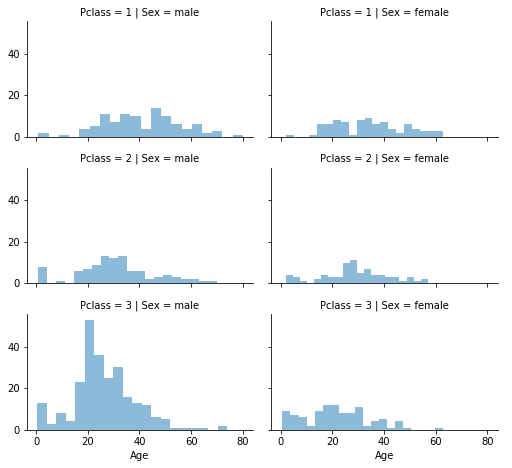

In [19]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let's start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.



In [20]:
guess_age=np.zeros((2,3))

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.


In [21]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)



In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3


In [23]:
 for dataset in combined:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            guess=guess_df.median()
            guess_age[i,j]=guess
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset['Sex']==i)&(dataset['Pclass']==j+1),'Age']=guess_age[i,j]
    dataset['Age']=dataset['Age'].astype(int)        
            
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int32
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 52.3+ KB


We now divide the age into groups in order to minimize the numbers.

In [24]:
train['AgeRange']=pd.cut(train['Age'],5)
train[['AgeRange','Survived']].groupby('AgeRange',as_index=False).mean().sort_values(by='AgeRange')

,AgeRange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
for dataset in combined:
    dataset.loc[dataset['Age']<=16,'Age']=1
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=2
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=3
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=4
    dataset.loc[(dataset['Age']>64)&(dataset['Age']<=80),'Age']=5
    dataset['Age']=dataset['Age'].astype(int)
train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange
0,0,3,0,2,1,0,7.2500,S,3,"(16.0, 32.0]"
1,1,1,1,3,1,0,71.2833,C,4,"(32.0, 48.0]"
2,1,3,1,2,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,3,1,0,53.1000,S,4,"(32.0, 48.0]"
4,0,3,0,3,0,0,8.0500,S,3,"(32.0, 48.0]"


Now we remove the age range as it is not needed anymore

In [26]:
train=train.drop('AgeRange',axis=1)
combined=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,3
1,1,1,1,3,1,0,71.2833,C,4
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,4
4,0,3,0,3,0,0,8.0500,S,3


We add the Family size instead of the Sibsp and parch features,also we may replace it with a new feature called Isalone to state if the passenger is alone or not.

And let's see the correlation with the survived feature.

In [27]:
for dataset in combined:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='FamilySize')    

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [28]:
for dataset in combined:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean().sort_values(by='IsAlone')      

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We drop the unused features.

In [29]:
train=train.drop(['SibSp','Parch','FamilySize'],axis=1)
test=test.drop(['SibSp','Parch','FamilySize'],axis=1)
combined=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,S,3,0
1,1,1,1,3,71.2833,C,4,0
2,1,3,1,2,7.9250,S,2,1
3,1,1,1,3,53.1000,S,4,0
4,0,3,0,3,8.0500,S,3,1


Let's handle the Embarked in the training set by filling the missing values with the most frequent Embarked.

In [30]:
freq=train.Embarked.dropna().mode()[0]
freq

'S'

In [31]:
train.loc[train['Embarked'].isnull(),'Embarked']=freq
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null int32
IsAlone     891 non-null int64
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 45.3+ KB


Let's convert it to numeric to make it more managable.

In [32]:
emb_map={'C':1,'S':2,'Q':3}
for dataset in combined:
    dataset['Embarked']=dataset['Embarked'].map(emb_map).astype(int)
train.head()        

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,2,3,0
1,1,1,1,3,71.2833,1,4,0
2,1,3,1,2,7.9250,2,2,1
3,1,1,1,3,53.1000,2,4,0
4,0,3,0,3,8.0500,2,3,1


We notice there is a missing value of the fare in the test set so let's put it and simplyify the numbers. 

In [33]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
Title          418 non-null int32
IsAlone        418 non-null int64
dtypes: float64(1), int32(4), int64(3)
memory usage: 19.7 KB


In [34]:
train['FareRange']=pd.qcut(train['Fare'],4)
train[['FareRange','Survived']].groupby('FareRange',as_index=False).mean().sort_values(by='FareRange')

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [35]:
for dataset in combined:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=1
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=2
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=3
    dataset.loc[(dataset['Fare']>31)&(dataset['Age']<=512.329),'Fare']=4
    dataset['Fare']=dataset['Fare'].astype(int)
    
train.head()    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareRange
0,0,3,0,2,1,2,3,0,"(-0.001, 7.91]"
1,1,1,1,3,4,1,4,0,"(31.0, 512.329]"
2,1,3,1,2,2,2,2,1,"(7.91, 14.454]"
3,1,1,1,3,4,2,4,0,"(31.0, 512.329]"
4,0,3,0,3,2,2,3,1,"(7.91, 14.454]"


We drop the fare range.


In [36]:
train=train.drop('FareRange',axis=1)
combined=[train,test]

In [37]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,1,2,3,0
1,1,1,1,3,4,1,4,0
2,1,3,1,2,2,2,2,1
3,1,1,1,3,4,2,4,0
4,0,3,0,3,2,2,3,1


In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,3,1,3,3,1
1,893,3,1,3,1,2,4,0
2,894,2,0,4,2,3,3,1
3,895,3,0,2,2,2,3,1
4,896,3,1,2,2,2,4,0


### Step 4: Model, predict and solve the problem

Now let's prepare the data to be entered into the model.

In [41]:
X_train=train.drop('Survived',axis=1).values
Y_train=train['Survived'].values
X_test=test.drop('PassengerId',axis=1).copy().values
X_train.shape,Y_train.shape,X_test.shape

((891, 7), (891,), (418, 7))

In [39]:
from sklearn.model_selection import train_test_split


In [67]:
Model1=tf.keras.Sequential([tf.keras.layers.Dense(128,activation='relu'),
                           
                           
                           tf.keras.layers.Dense(1,activation='sigmoid')])
Model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model1.fit(X_train,Y_train,epochs=500,verbose=2,batch_size=64,validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/500
623/623 - 1s - loss: 0.6614 - acc: 0.6051 - val_loss: 0.6023 - val_acc: 0.6418
Epoch 2/500
623/623 - 0s - loss: 0.6162 - acc: 0.6437 - val_loss: 0.5601 - val_acc: 0.7575
Epoch 3/500
623/623 - 0s - loss: 0.5923 - acc: 0.6854 - val_loss: 0.5355 - val_acc: 0.7425
Epoch 4/500
623/623 - 0s - loss: 0.5743 - acc: 0.6918 - val_loss: 0.5202 - val_acc: 0.7612
Epoch 5/500
623/623 - 0s - loss: 0.5620 - acc: 0.7175 - val_loss: 0.5084 - val_acc: 0.7724
Epoch 6/500
623/623 - 0s - loss: 0.5494 - acc: 0.7207 - val_loss: 0.4990 - val_acc: 0.7463
Epoch 7/500
623/623 - 0s - loss: 0.5395 - acc: 0.7352 - val_loss: 0.4893 - val_acc: 0.7612
Epoch 8/500
623/623 - 0s - loss: 0.5278 - acc: 0.7416 - val_loss: 0.4822 - val_acc: 0.7724
Epoch 9/500
623/623 - 0s - loss: 0.5186 - acc: 0.7608 - val_loss: 0.4742 - val_acc: 0.7724
Epoch 10/500
623/623 - 0s - loss: 0.5114 - acc: 0.7640 - val_loss: 0.4693 - val_acc: 0.7724
Epoch 11/500
623/623 - 0s - loss: 0.5049 - 

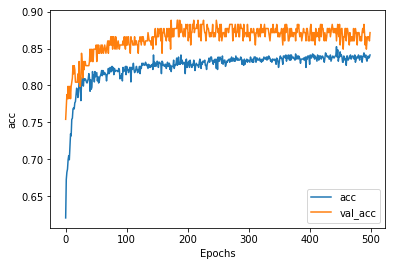

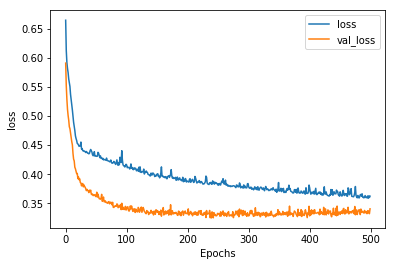

In [236]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

# Trying Another Models


In [73]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.46

In [86]:
dec_tree=DecisionTreeClassifier(max_depth=50,min_samples_split=2)
dec_tree.fit(X_train,Y_train)
Y_pred=dec_tree.predict(X_test)
dec_acc=round(dec_tree.score(X_train,Y_train)*100,2)
dec_acc

86.64

In [117]:
tf_acc=round(history.history['acc'][-1]*100,2)

In [118]:
rand_for=RandomForestClassifier(n_estimators=200,min_samples_leaf=1,min_samples_split=2)
rand_for.fit(X_train,Y_train)
Y_pred=rand_for.predict(X_test)
rand_acc=round(rand_for.score(X_train,Y_train)*100,2)
rand_acc

86.64

In [119]:
acc=pd.DataFrame({'Accuracy':[tf_acc,acc_log,dec_acc,rand_acc],'Model':['Tensor_Flow','Logistic Regression','Decision Tree','Random Forest']},columns=['Model','Accuracy'])
acc = acc[['Model','Accuracy']]

In [120]:
acc

,Model,Accuracy
0,Tensor_Flow,84.27
1,Logistic Regression,79.46
2,Decision Tree,86.64
3,Random Forest,86.64


# Using Confusion Matrix 

In [124]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [125]:
X_test2.shape

(268, 7)

### Using neural network

In [178]:
Model2=tf.keras.Sequential([tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(64,activation='relu'),
                           
                           tf.keras.layers.Dense(1,activation='sigmoid')])
Model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model1.fit(X_train2,Y_train2,epochs=100,verbose=2,batch_size=64,validation_split=0.1)

Train on 560 samples, validate on 63 samples
Epoch 1/100
560/560 - 0s - loss: 0.2925 - acc: 0.8714 - val_loss: 0.2927 - val_acc: 0.9206
Epoch 2/100
560/560 - 0s - loss: 0.2937 - acc: 0.8696 - val_loss: 0.2963 - val_acc: 0.8889
Epoch 3/100
560/560 - 0s - loss: 0.2934 - acc: 0.8696 - val_loss: 0.3003 - val_acc: 0.8730
Epoch 4/100
560/560 - 0s - loss: 0.2965 - acc: 0.8750 - val_loss: 0.2919 - val_acc: 0.8889
Epoch 5/100
560/560 - 0s - loss: 0.2882 - acc: 0.8714 - val_loss: 0.2957 - val_acc: 0.8889
Epoch 6/100
560/560 - 0s - loss: 0.2931 - acc: 0.8732 - val_loss: 0.2897 - val_acc: 0.9048
Epoch 7/100
560/560 - 0s - loss: 0.2947 - acc: 0.8714 - val_loss: 0.2889 - val_acc: 0.8889
Epoch 8/100
560/560 - 0s - loss: 0.2911 - acc: 0.8696 - val_loss: 0.3036 - val_acc: 0.9048
Epoch 9/100
560/560 - 0s - loss: 0.2905 - acc: 0.8750 - val_loss: 0.2959 - val_acc: 0.9048
Epoch 10/100
560/560 - 0s - loss: 0.2916 - acc: 0.8714 - val_loss: 0.2992 - val_acc: 0.8889
Epoch 11/100
560/560 - 0s - loss: 0.2968 - a

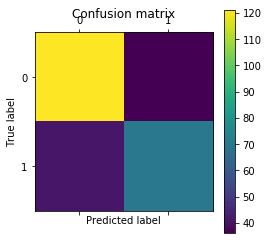

In [134]:
from sklearn.metrics import confusion_matrix

yhat=Model2.predict(X_test2)
cm=confusion_matrix(Y_test2,yhat.round())
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [135]:
cm

array([[121,  36],
       [ 41,  70]], dtype=int64)

In [136]:
from sklearn.metrics import classification_report

print(classification_report(Y_test2,yhat.round()))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       157
           1       0.66      0.63      0.65       111

    accuracy                           0.71       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.71      0.71      0.71       268



### Using Logistic Regression

In [155]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train2, Y_train2)
Y_pred = logreg.predict(X_test2)
acc_log = round(logreg.score(X_train2, Y_train2) * 100, 2)
acc_log

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.13

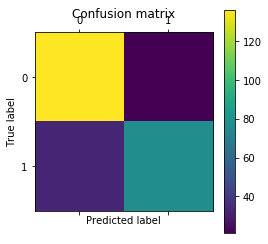

In [156]:
cm=confusion_matrix(Y_test2,Y_pred.round())
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [157]:
cm

array([[136,  21],
       [ 33,  78]], dtype=int64)

In [158]:
print(classification_report(Y_test2,Y_pred.round()))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.70      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Using Decision Tree

In [159]:
dec_tree=DecisionTreeClassifier(max_depth=50,min_samples_split=2)
dec_tree.fit(X_train2,Y_train2)
Y_pred2=dec_tree.predict(X_test2)
dec_acc=round(dec_tree.score(X_train2,Y_train2)*100,2)
dec_acc

87.96

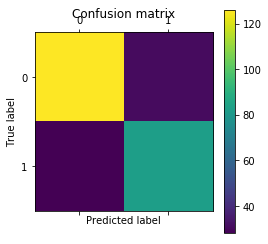

In [160]:
cm=confusion_matrix(Y_test2,Y_pred2.round())
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [161]:
cm


array([[126,  31],
       [ 28,  83]], dtype=int64)

In [162]:
print(classification_report(Y_test2,Y_pred2.round()))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       157
           1       0.73      0.75      0.74       111

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.78      0.78      0.78       268



### Using Random Forest

In [163]:
rand_for=RandomForestClassifier(n_estimators=200,min_samples_leaf=1,min_samples_split=2)
rand_for.fit(X_train2,Y_train2)
Y_pred3=rand_for.predict(X_test2)
rand_acc=round(rand_for.score(X_train2,Y_train2)*100,2)
rand_acc

87.96

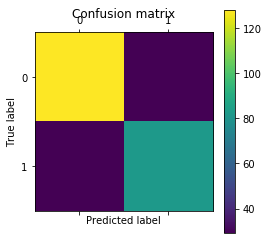

In [164]:
cm=confusion_matrix(Y_test2,Y_pred3.round())
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [165]:
cm

array([[128,  29],
       [ 29,  82]], dtype=int64)

In [166]:
print(classification_report(Y_test2,Y_pred3.round()))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.74      0.74      0.74       111

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [174]:
from sklearn import svm

In [191]:
sv=svm.SVC()
sv.fit(X_train2,Y_train2)
Y_pred4=rand_for.predict(X_test2)
svm_acc=round(sv.score(X_train2,Y_train2)*100,2)
svm_acc

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.5